In [1]:
RA=211.181999999333
DEC=-14.9809999994415
coords=str(RA)+' '+str(DEC)

In [2]:
from astroquery.mast import Observations
from astroquery.mast import Catalogs
from astroquery.ned.core import RemoteServiceError
from astropy.table import Table
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

import pandas as pd

In [3]:
obs_table = Observations.query_region(coords,radius=5*u.arcsec)
print(obs_table[10:11])

intentType obs_collection provenance_name ... srcDen    obsid    distance
---------- -------------- --------------- ... ------ ----------- --------
   science           HLSP           K2SFF ...    nan 18001872655      0.0


In [4]:
obsid1 = '18001872655'
data_products = Observations.get_product_list(obsid1)
manifest = Observations.download_products(data_products)

INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_correction.png with expected size 12934. [astroquery.query]
INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_image.png with expected size 6842. [astroquery.query]
INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_medians.png with expected size 3462. [astroquery.query]
INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_skypos.png with expected size 7285. [astroquery.query]
INFO: Found cached file ./mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc.png with expected size 28993. [astroquery

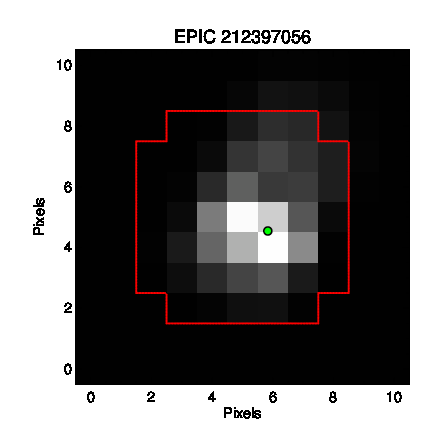

In [5]:
from IPython.display import Image
Image(filename='mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_image.png')

Some interesting data representation. 

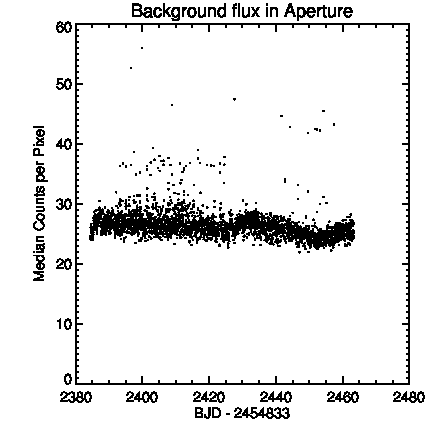

In [6]:
Image(filename='mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_medians.png')

The **"Corrected 6 hour precision"** has all of the corrections done and is best representative of what actually would have been received. 

Flux is relative to the mean. 

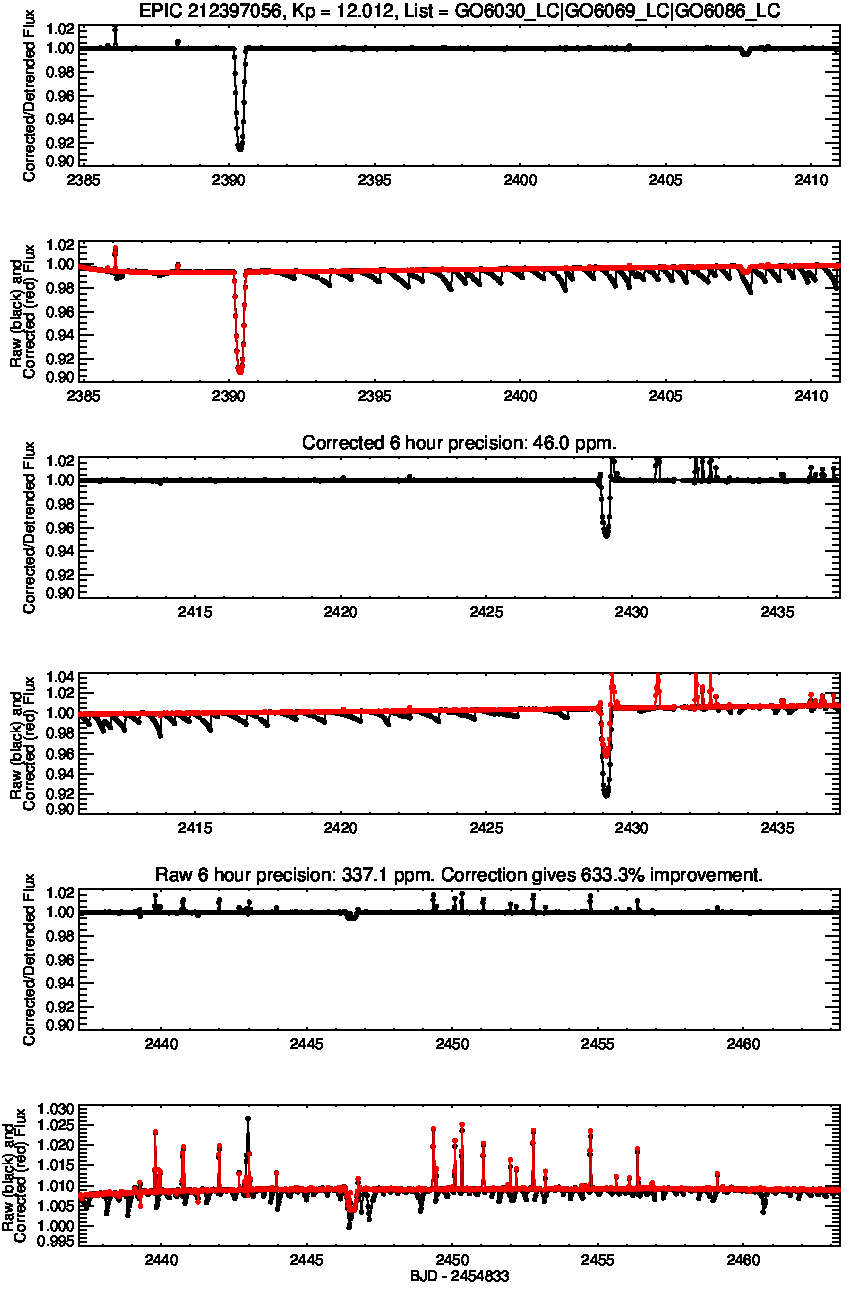

In [7]:
Image(filename='mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc.png')

In [8]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200812 20:28:24 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200812 20:28:24 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


[I 200812 20:28:24 utils:141] NumExpr defaulting to 6 threads.


Text(0, 0.5, 'Flux')

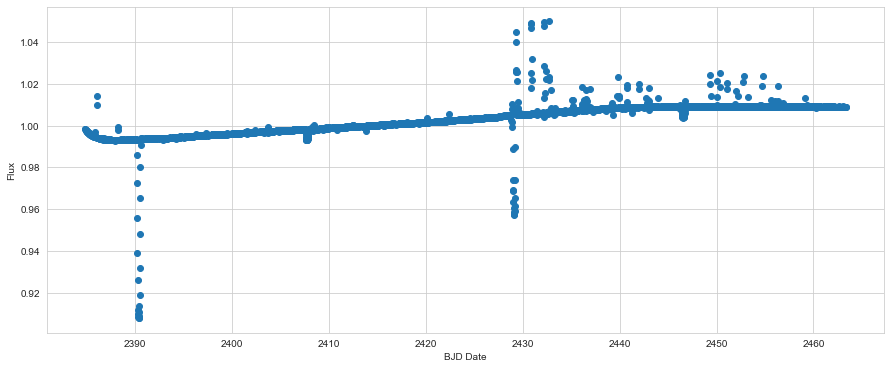

In [9]:
%matplotlib inline 
sns.set_style("whitegrid")
plt.figure(figsize=(15,6))

df=pd.read_csv('mastDownload\HLSP\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc\hlsp_k2sff_k2_lightcurve_212397056-c06_kepler_v1_llc-default-aper.txt', sep=",",skiprows=1,header=None,names=['times','fluxes','extra'])
df['errs']=df['fluxes']*0.01
df=df.drop(columns=['extra'])
dates=df['times'].to_numpy()
fluxes=df['fluxes'].to_numpy()
errs=df['errs'].to_numpy()

plt.scatter(dates,fluxes)
plt.xlabel('BJD Date')
plt.ylabel('Flux')

In [10]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs,magsarefluxes=True)

[I 200812 20:28:24 zgls:597] using autofreq with 3920 frequency points, start P = 0.100, end P = 78.499
[I 200812 20:28:24 zgls:607] using 6 workers...


In [11]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs, magsarefluxes=True)

[I 200812 20:28:27 nonphysical:216] spline fit done. nknots = 30,  chisq = 149.58023, reduced chisq = 0.04401
[I 200812 20:28:27 png:696] plotting phased LC with period 78.499265, epoch 2389.26550
[I 200812 20:28:27 nonphysical:216] spline fit done. nknots = 30,  chisq = 1126.51138, reduced chisq = 0.33142
[I 200812 20:28:27 png:696] plotting phased LC with period 39.249632, epoch 2428.39276
[I 200812 20:28:27 nonphysical:216] spline fit done. nknots = 30,  chisq = 149.73424, reduced chisq = 0.04404
[I 200812 20:28:27 png:696] plotting phased LC with period 156.998530, epoch 2389.10204
[I 200812 20:28:27 nonphysical:216] spline fit done. nknots = 30,  chisq = 820.34369, reduced chisq = 0.24128
[I 200812 20:28:27 png:696] plotting phased LC with period 65.416054, epoch 2400.03330
[I 200812 20:28:28 nonphysical:216] spline fit done. nknots = 30,  chisq = 1126.51138, reduced chisq = 0.33142
[I 200812 20:28:28 png:696] plotting phased LC with period 39.249632, epoch 2428.39276
[I 200812 20

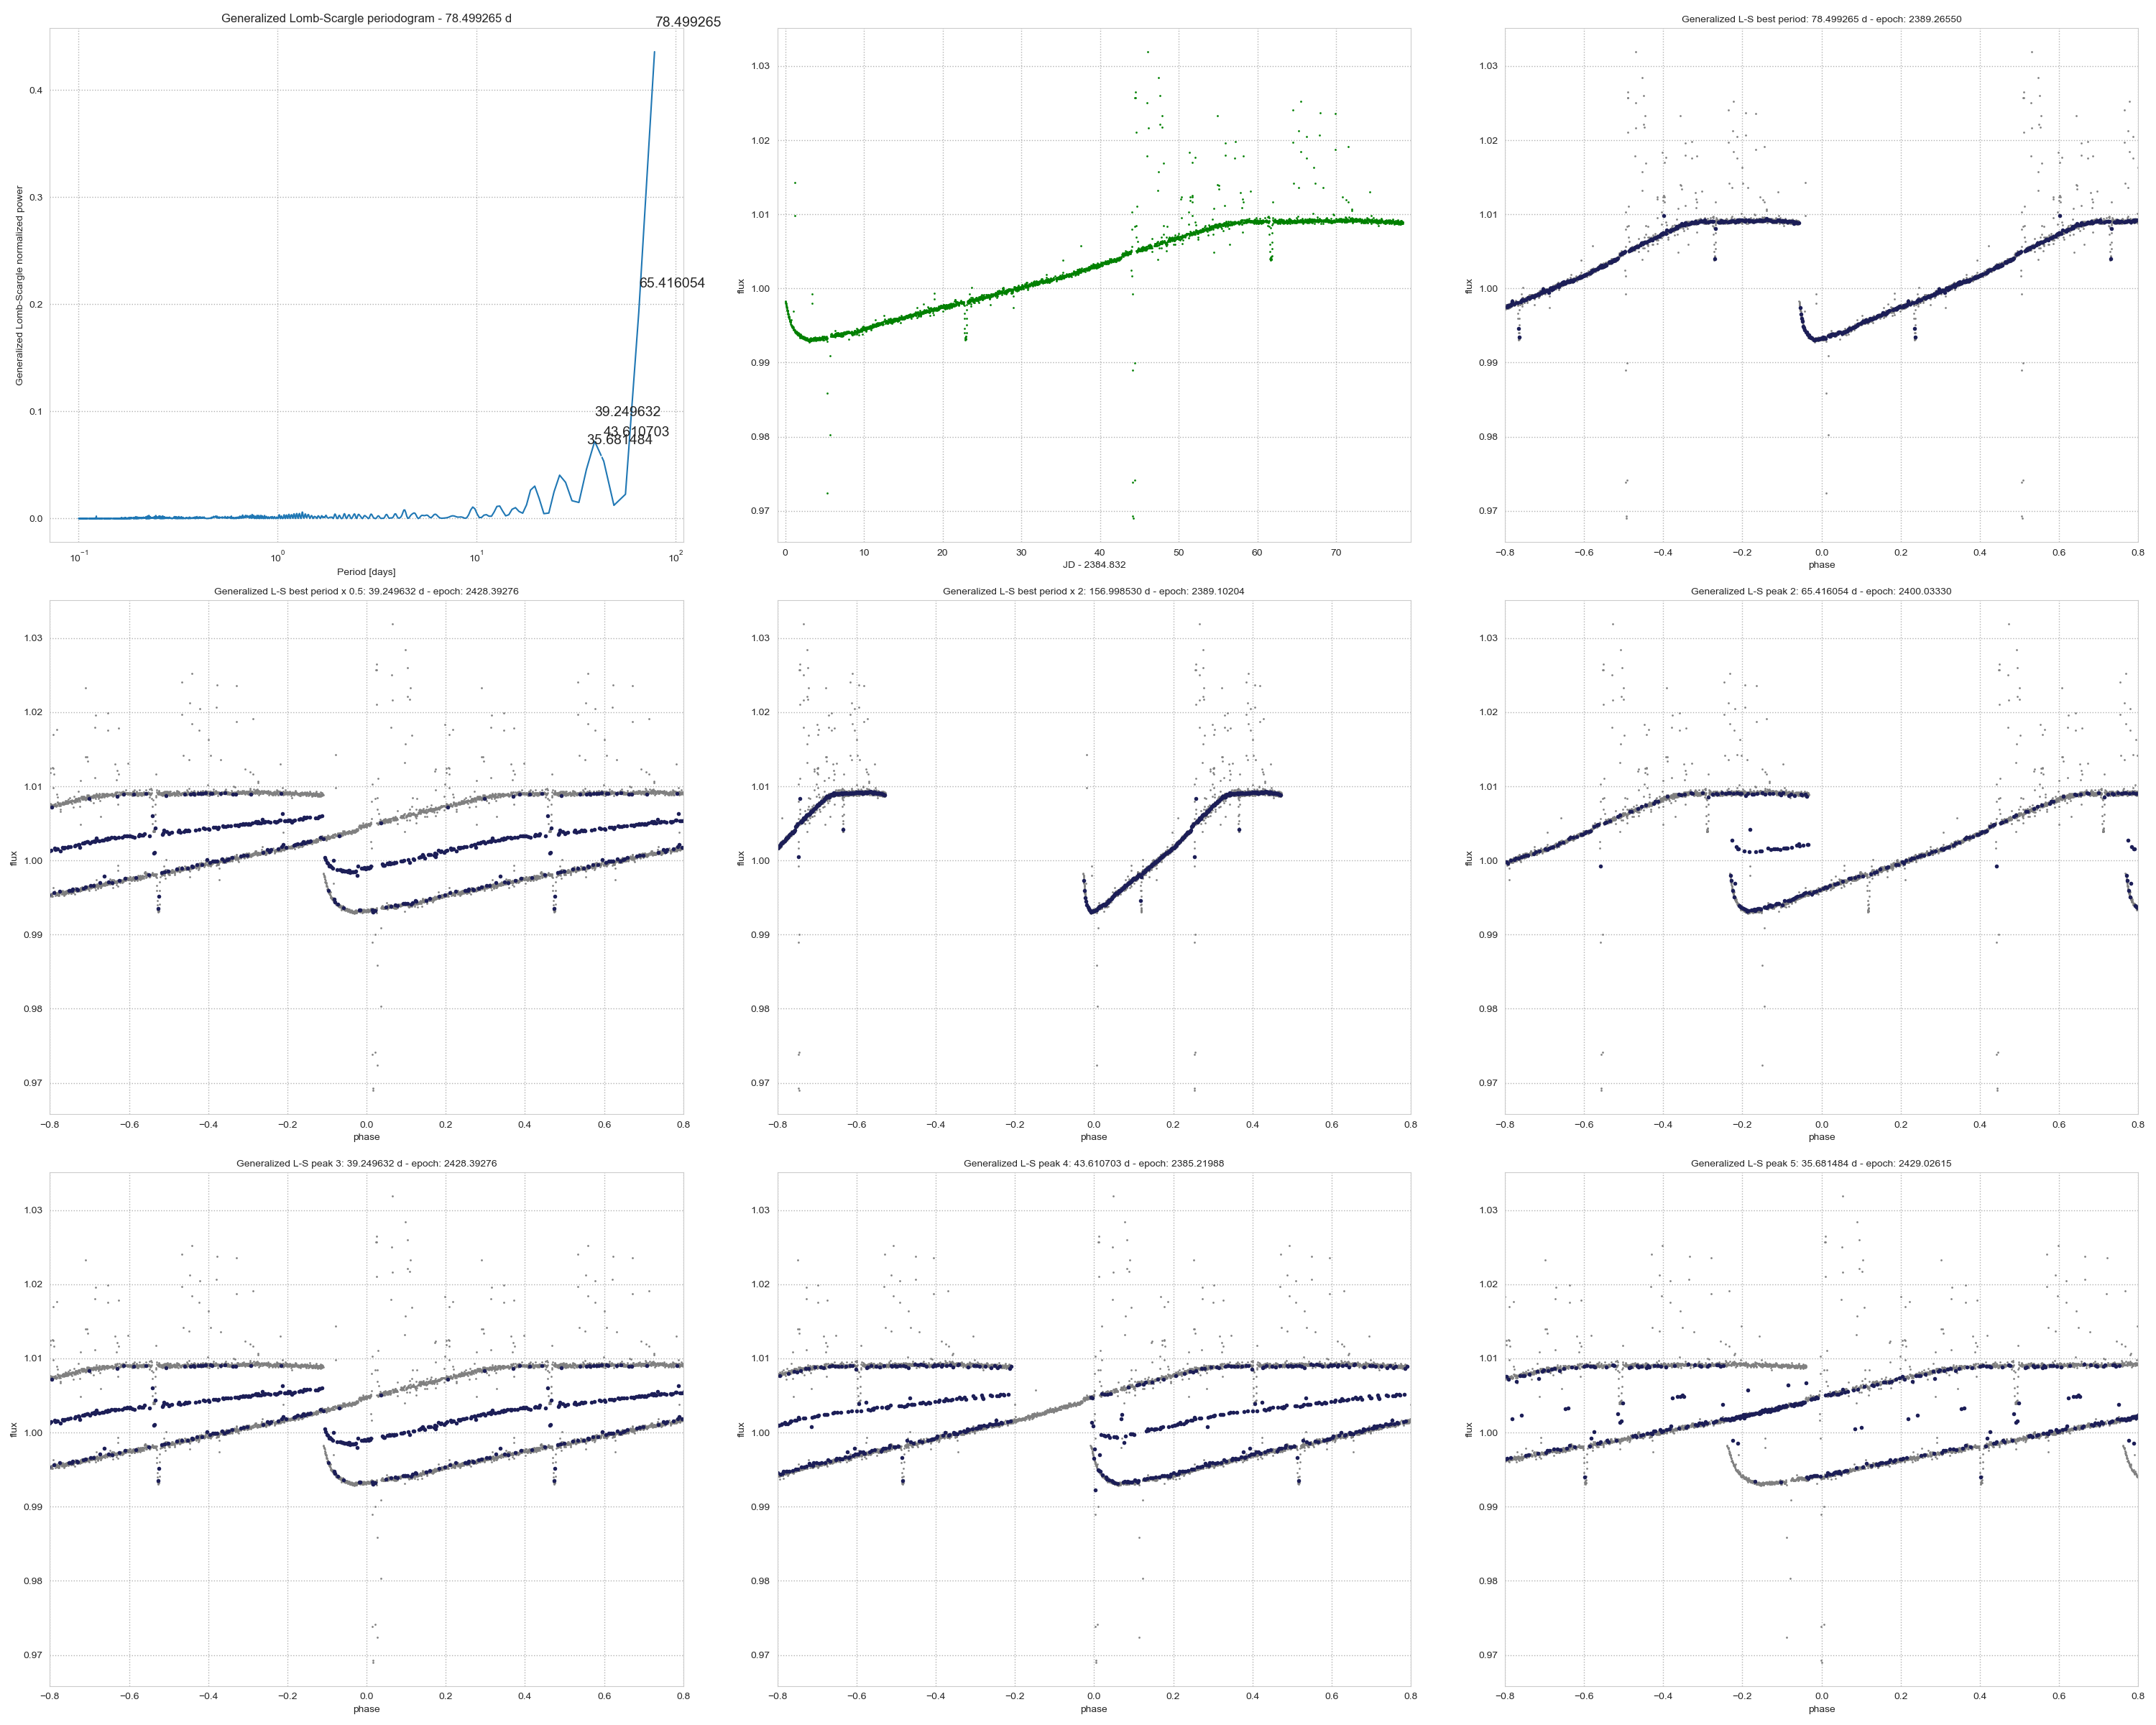

In [12]:
Image('glsp-checkplot.png')

In [13]:
glsp

{'bestperiod': 78.49926481800048,
 'bestlspval': 0.43568429752245735,
 'nbestpeaks': 5,
 'nbestlspvals': [0.43568429752245735,
  0.19260914052767195,
  0.07211334668212753,
  0.05353514012508494,
  0.04581702665631937],
 'nbestperiods': [78.49926481800048,
  65.4160540150004,
  39.24963240900024,
  43.61070267666694,
  35.68148400818203],
 'lspvals': array([4.35684298e-01, 1.92609141e-01, 2.27039012e-02, ...,
        5.92159088e-05, 8.98459385e-05, 1.06964430e-04]),
 'omegas': array([ 0.08004133,  0.09604959,  0.11205786, ..., 62.78441673,
        62.80042499, 62.81643326]),
 'periods': array([78.49926482, 65.41605402, 56.07090344, ...,  0.10007555,
         0.10005004,  0.10002455]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [14]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [78.49926481800048, 65.4160540150004, 39.24963240900024, 43.61070267666694, 35.68148400818203] (days)


In [15]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs)

[I 200812 20:28:29 abls:919] min P: 0.1, max P: 100.0, nfreq: 313684, minfreq: 0.01, maxfreq: 10.0
[I 200812 20:28:29 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 3.184743202113061e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200812 20:28:29 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 78.499,  will make minfreq = 2 x 1/timebase
[W 200812 20:28:29 abls:969] new minfreq: 0.025477945616904488, maxfreq: 10.0
[I 200812 20:28:29 abls:980] using 6 workers...
[I 200812 20:28:29 abls:1090] worker 1: minfreq = 0.025478, nfreqs = 52280
[I 200812 20:28:29 abls:1090] worker 2: minfreq = 1.690462, nfreqs = 52280
[I 200812 20:28:29 abls:1090] worker 3: minfreq = 3.355445, nfreqs = 52280
[I 200812 20:28:29 abls:1090] worker 4: minfreq = 5.020429, nfreqs = 52280
[I 200812 20:28:29 abls:1090] worker 5: minfreq = 6.685413, nfreqs = 52280
[I 200812 20:28:29 abls:1090] worker 6: minfreq = 8.350397, nfre

In [16]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs)

[I 200812 20:29:10 nonphysical:216] spline fit done. nknots = 30,  chisq = 1134.96024, reduced chisq = 0.33381
[I 200812 20:29:10 png:696] plotting phased LC with period 38.717270, epoch 2423.30526
[I 200812 20:29:10 nonphysical:216] spline fit done. nknots = 30,  chisq = 1263.52871, reduced chisq = 0.37163
[I 200812 20:29:10 png:696] plotting phased LC with period 19.358635, epoch 2404.07885
[I 200812 20:29:10 nonphysical:216] spline fit done. nknots = 30,  chisq = 192.73955, reduced chisq = 0.05669
[I 200812 20:29:10 png:696] plotting phased LC with period 77.434540, epoch 2450.90846
[I 200812 20:29:10 nonphysical:216] spline fit done. nknots = 30,  chisq = 1263.52871, reduced chisq = 0.37163
[I 200812 20:29:10 png:696] plotting phased LC with period 19.358635, epoch 2404.07885
[I 200812 20:29:11 nonphysical:216] spline fit done. nknots = 30,  chisq = 1292.17161, reduced chisq = 0.38005
[I 200812 20:29:11 png:696] plotting phased LC with period 23.362876, epoch 2430.04773
[I 200812 2

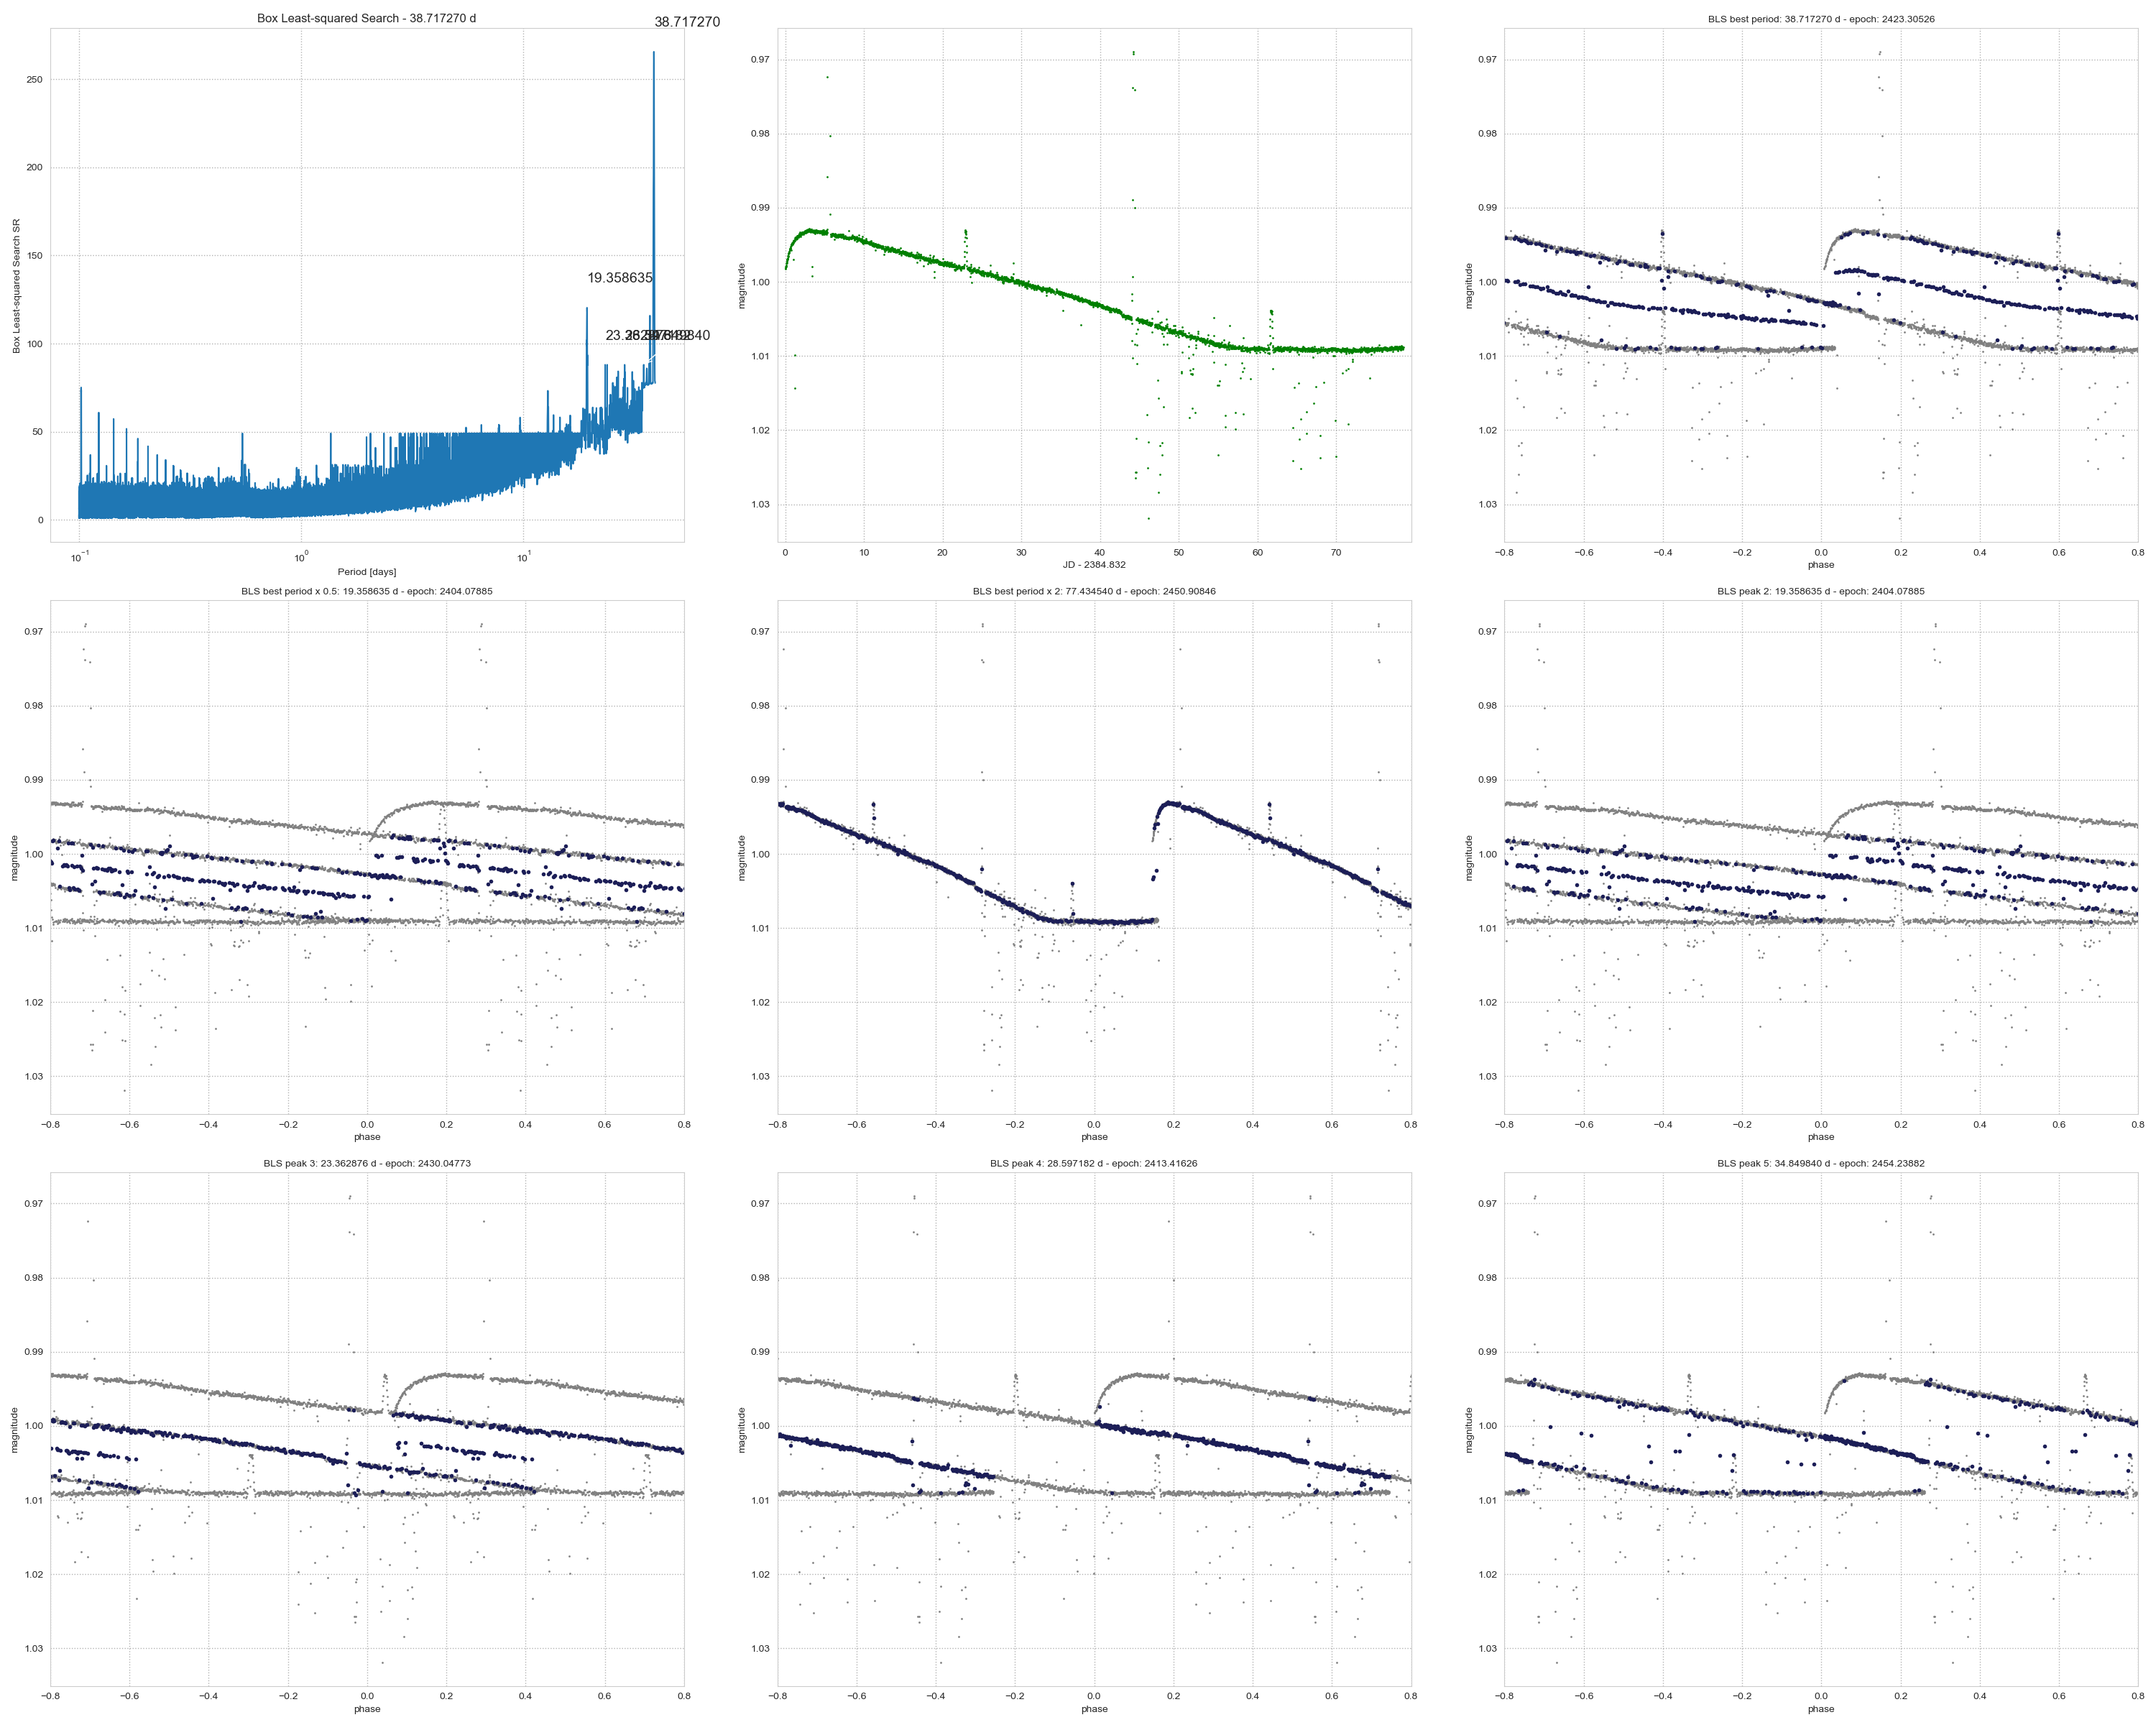

In [17]:
Image('bls-checkplot.png')

In [18]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs)

[I 200812 20:29:30 spdm:337] using autofreq with 3920 frequency points, start P = 0.100, end P = 78.499
[I 200812 20:29:30 spdm:349] using 6 workers...


In [19]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs)

[I 200812 20:29:39 nonphysical:216] spline fit done. nknots = 30,  chisq = 149.58023, reduced chisq = 0.04401
[I 200812 20:29:39 png:696] plotting phased LC with period 78.499265, epoch 2450.07076
[I 200812 20:29:39 nonphysical:216] spline fit done. nknots = 30,  chisq = 1126.51138, reduced chisq = 0.33142
[I 200812 20:29:39 png:696] plotting phased LC with period 39.249632, epoch 2463.31050
[I 200812 20:29:39 nonphysical:216] spline fit done. nknots = 30,  chisq = 149.73424, reduced chisq = 0.04404
[I 200812 20:29:39 png:696] plotting phased LC with period 156.998530, epoch 2450.54069
[I 200812 20:29:39 nonphysical:216] spline fit done. nknots = 30,  chisq = 234.67176, reduced chisq = 0.06902
[I 200812 20:29:39 png:696] plotting phased LC with period 0.102133, epoch 2451.76659
[I 200812 20:29:39 nonphysical:216] spline fit done. nknots = 30,  chisq = 172.37727, reduced chisq = 0.05070
[I 200812 20:29:39 png:696] plotting phased LC with period 0.122617, epoch 2450.70414
[I 200812 20:29

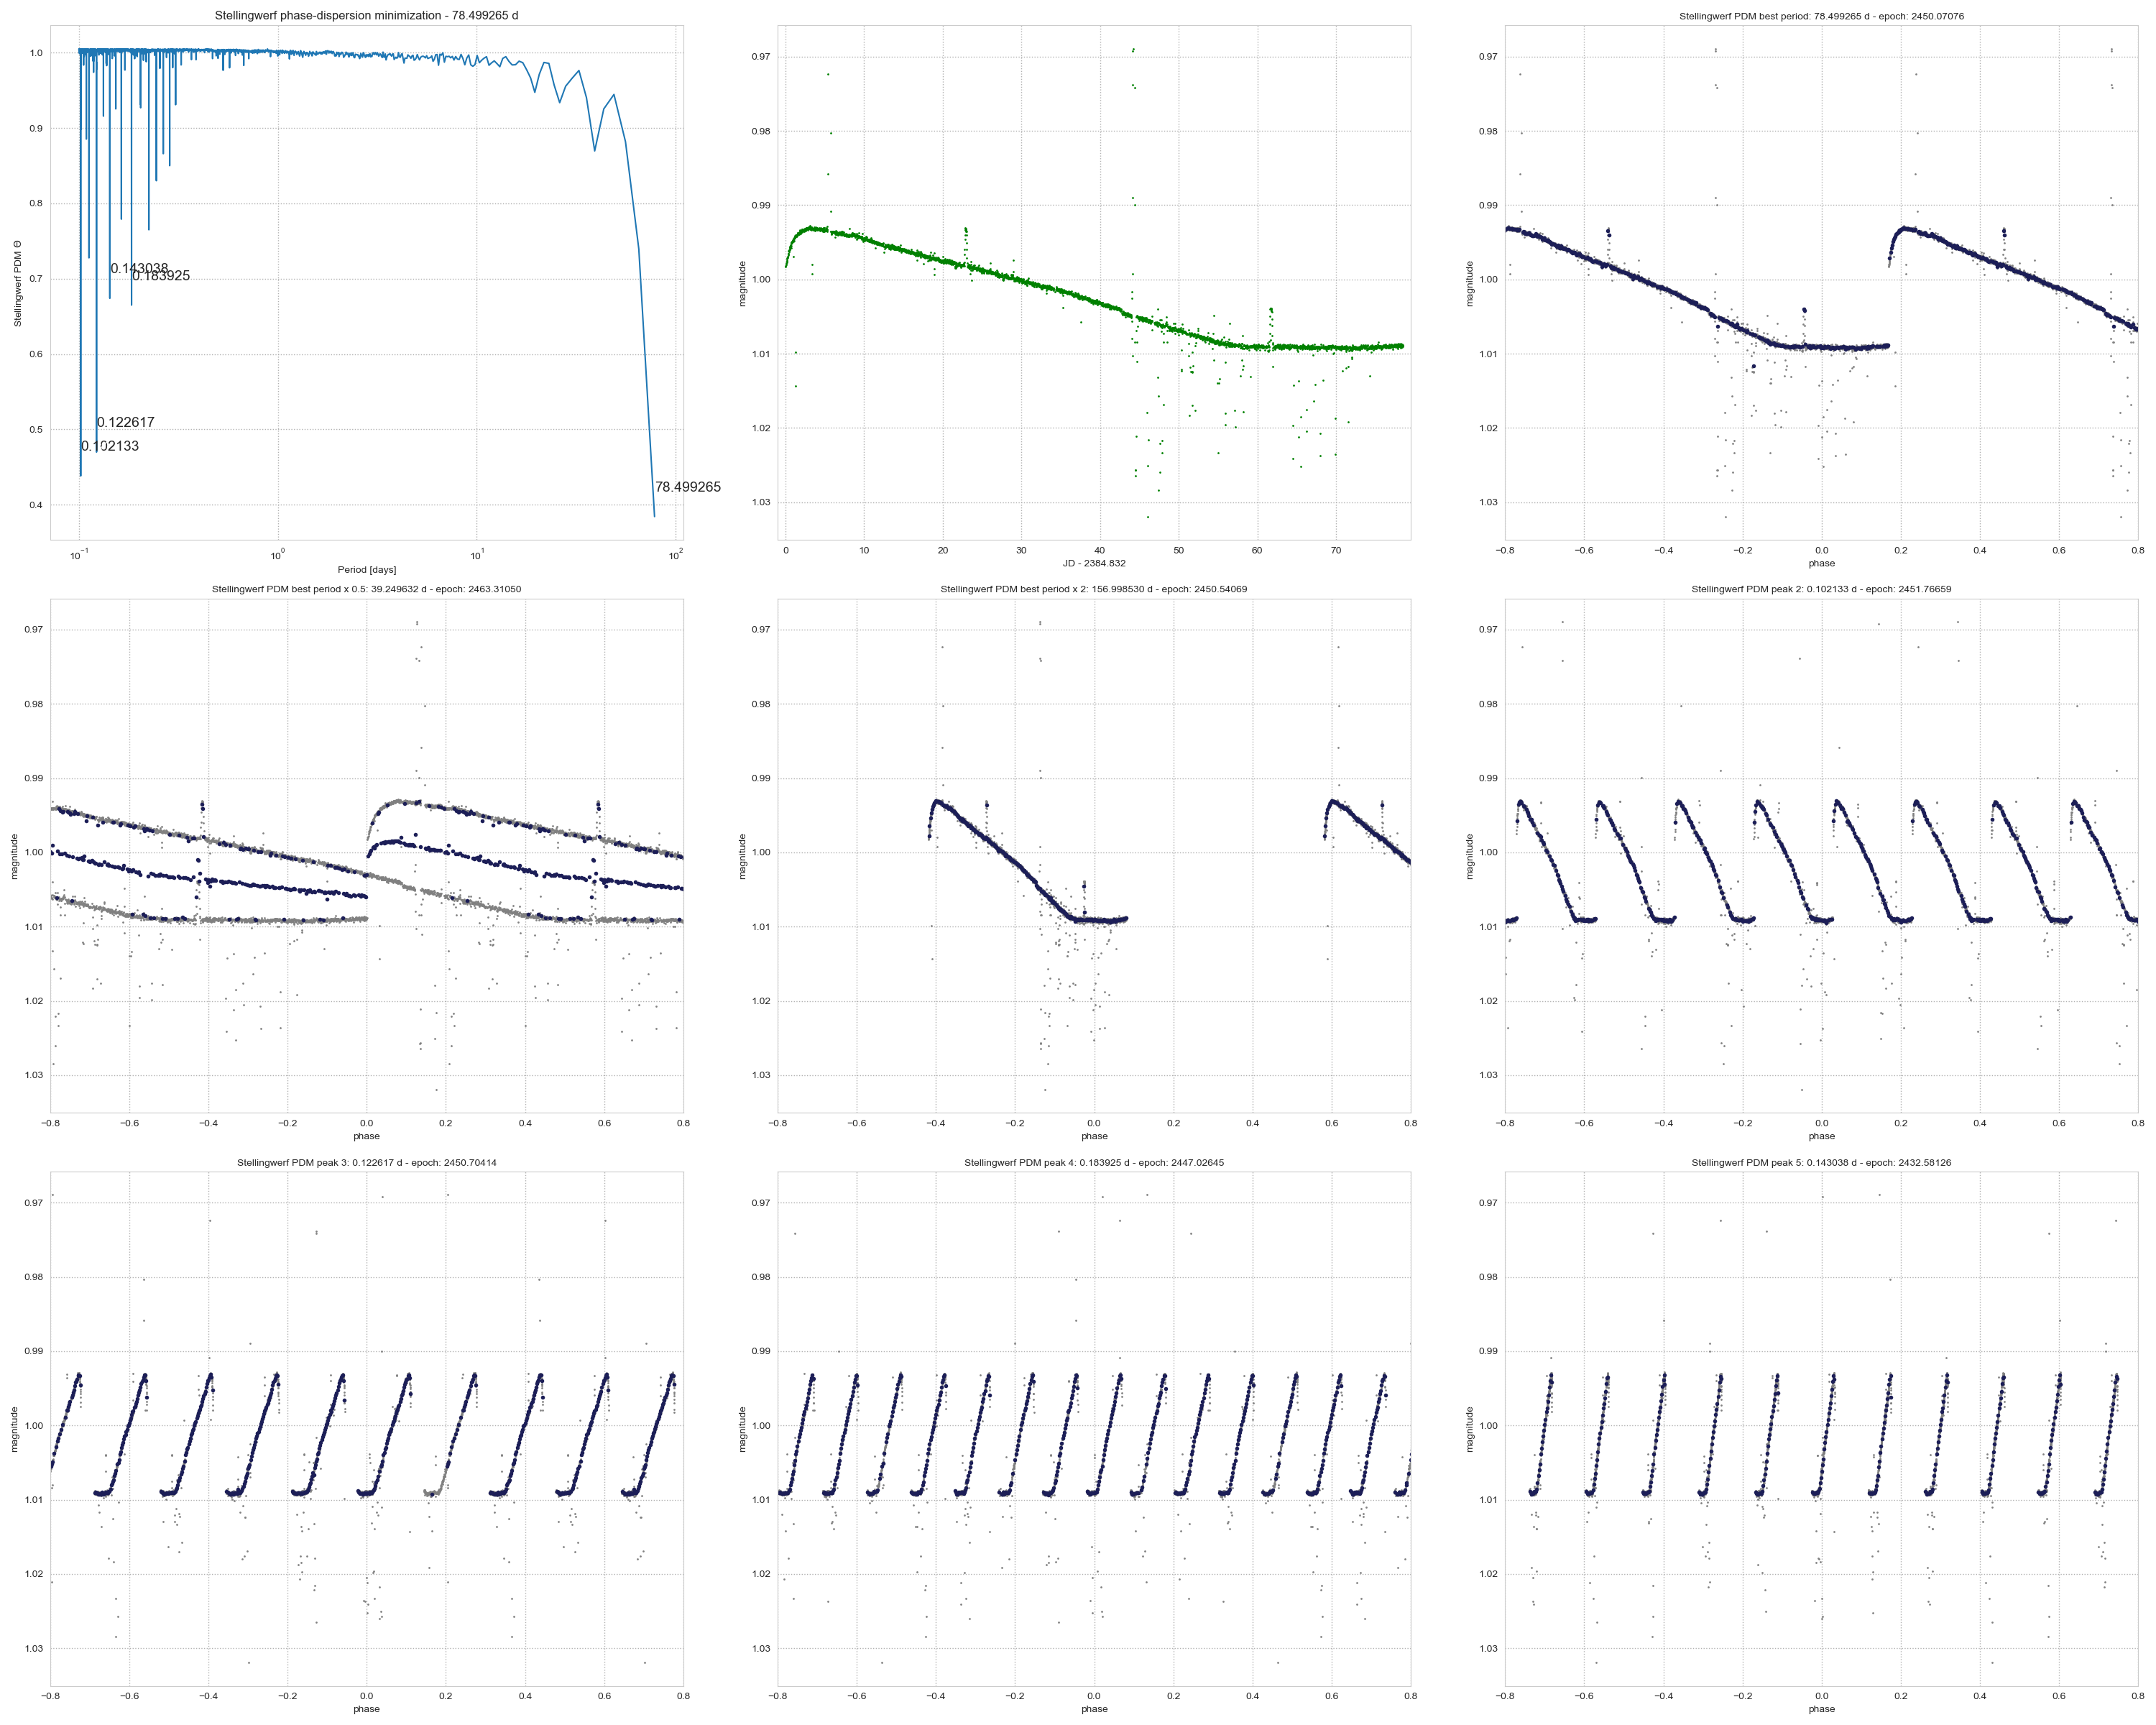

In [20]:
Image('spdm-checkplot.png')

In [21]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [78.49926481800048, 0.10213279315378672, 0.12261678353327159, 0.1839251752999074, 0.143038018983237] (days)
